In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Dataset loader for IRIS
from sklearn.datasets import load_iris

# Support vector machine - learns coefficients of a function basis-set 
# (Gaussians, for example) in order to construct a decision boundary.
from sklearn.svm import SVC

In [4]:
iris_data = load_iris()

x = iris_data['data']
y = iris_data['target']

# This data is not shuffled (labels are 0,0,0,0,...,1,1,1,1,...,2,2,2,2)
# So let's shuffle it with a fixed random seed
np.random.seed(12345)
idx = np.random.permutation(x.shape[0])
x = x[idx]
y = y[idx]

# Make a train-test split
train_x = x[0:100]
train_y = y[0:100]
test_x = x[100:]
test_y = y[100:]

print("Dataset has %d rows, %d features" % (x.shape[0], x.shape[1]))

Dataset has 150 rows, 4 features


In [5]:
# Predict labels

classifier = SVC(C=1, gamma=1)

classifier.fit(train_x, train_y)

p = classifier.predict(test_x)

print("Test accuracy is: %.6g" % (np.mean(p==test_y)))

Test accuracy is: 0.98


Test accuracy is: 0.96


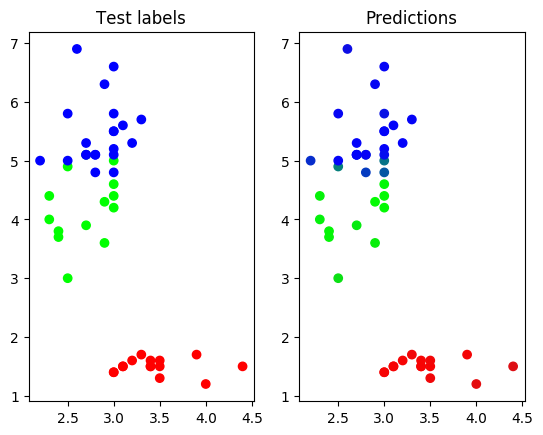

In [22]:
# Predict probabilities

classifier = SVC(C=1, gamma=1, probability=True)

classifier.fit(train_x, train_y)

p = classifier.predict_proba(test_x)

print("Test accuracy is: %.6g" % (np.mean(np.argmax(p,axis=1)==test_y)))

ec = np.zeros((test_y.shape[0], 3))
ec[:,0] = test_y==0
ec[:,1] = test_y==1
ec[:,2] = test_y==2

plt.subplot(1,2,1)
plt.title("Test labels")
plt.scatter(test_x[:,1], test_x[:,2], c=ec)

plt.subplot(1,2,2)
plt.title("Predictions")
plt.scatter(test_x[:,1], test_x[:,2], c=p)
plt.show()